# Lesson 2

## DBSCAN

## Loading libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Let's create a fake dataset for classification.

In [18]:
#random_state = 4
# random_state = 135
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

In [19]:
X_df = pd.DataFrame(data=X, columns = ['X1','X2'])
X_df.head()

,X1,X2
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569


## First model

In [20]:
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled_np = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_df.columns)
model = DBSCAN() # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#model.fit(X)
#yhat = model.predict(X)
yhat = model.fit_predict(X_scaled_df)

In [21]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.55


Now let's create an instance of DBSCAN and train the model.

In [22]:
yhat

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [23]:
X_df['cluster'] = yhat
X_df.head()

,X1,X2,cluster
0,1.225160,-0.951731,0
1,1.016304,-1.725175,0
2,0.335340,-1.724896,0
3,1.786348,-1.782653,0
4,1.016751,1.062569,0


Now we collect the unique cluster predictions

In [24]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0])

DBSCAN flags "Noise" points with the "-1" label. Therefore, with the default settings, DBSCAN it's only able to find one cluster.

In [25]:
list(clusters)

[-1, 0]

Finally we visuallize the results

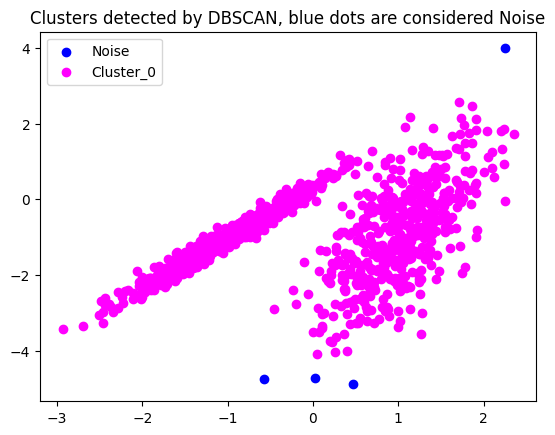

In [26]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
colors = ["b","magenta", "green"]
for index, cluster in enumerate(list(clusters)):
	# get row indexes for samples with this cluster
	#row_ix = np.where(yhat == cluster)
	#X_df[X_df['clusters'] == cluster]
	# create scatter of these samples
	#plt.scatter(X[row_ix, 0], X[row_ix, 1])
	if (cluster == -1): 
		c_label = "Noise"
	else:
		c_label = "Cluster_" + str(cluster)
	c_color = colors[index]
	plt.scatter(X_df[X_df['cluster']==cluster]['X1'],X_df[X_df['cluster']==cluster]['X2'], color=c_color, label=c_label)
	# plt.scatter(X_df.iloc[row_ix,0],X_df.iloc[row_ix,1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.legend()
plt.show()

## Fine tunning

In order to find out the best value for **$\epsilon$**, we follow these steps:

1. Compute the distance matrix between the all the observations
2. We fix the number of nearest neighbours **k** to MinPoints= 2*number_of_features
3. We get all the distances from each point to it's k-nearest-neighbourgh.
4. We sort all those distances in descending order.
5. We plot those distances.

### Step 1

In [27]:
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)
print()

[[0.         0.72038629 1.03786511 ... 0.85330157 0.44426592 0.28935095]
 [0.72038629 0.         0.58838527 ... 1.57261387 0.46112436 0.43106276]
 [1.03786511 0.58838527 0.         ... 1.83133645 0.59632863 0.80954324]
 ...
 [0.85330157 1.57261387 1.83133645 ... 0.         1.24705515 1.14221682]
 [0.44426592 0.46112436 0.59632863 ... 1.24705515 0.         0.2776768 ]
 [0.28935095 0.43106276 0.80954324 ... 1.14221682 0.2776768  0.        ]]



### Step 2

We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [28]:
d2 = np.sort(d)[:,1:]
print(d2)

[[0.04060275 0.04848294 0.0593718  ... 4.0244187  4.22279234 4.53452525]
 [0.04842671 0.05454555 0.06134021 ... 3.84625056 3.91586839 5.25388016]
 [0.02866128 0.06689524 0.10288659 ... 4.00027275 4.04714088 5.40335899]
 ...
 [0.0102283  0.03888082 0.04351782 ... 4.61404214 4.72092496 4.91079551]
 [0.02731057 0.02974433 0.05024921 ... 3.58190895 3.78098875 4.87661924]
 [0.05450475 0.06397745 0.06554755 ... 3.81537429 4.01675591 4.82324274]]


### Step 3

In this dataset we have two features. Therefore, we will set the MinPoints=2*2=4.

Then, the number of neighours in the neighbourhood will be set to four. How we can know a temptative value for the Epsilon? One way is to look at the biggest distance between each point and the MinPoints in the neighbourhood of the point. This will give us an idea how big are the distances in the dataset. Of course, the biggest distance in the neighbourhood of each point will be different for each point but will give us a rough idea of how to set the value for Epsilon.

We have computed the distance matrix. Let's get the fourht highest distance of each point (we have set the number of points in the neighbourhood to four). We select the 4-th column, (ie. the distance from each point to it's 4-th nearest neighbourgh (Remember that in Python the indexes starts at 0, therefore the 4th neighbourh corresponds to the 3rd index)

In [29]:
f = d2[:,3]
print(f) # The distances between every point and it's 4th nearest neighbour.

[0.08615111 0.11156056 0.11049589 0.40562249 0.25329665 0.06344785
 0.07782494 0.12890719 0.09303986 0.13329204 0.09582298 0.02874567
 0.02054085 0.02606178 0.0542399  0.0420499  0.09570202 0.06439577
 0.05527617 0.03161892 0.06352763 0.08032789 0.16529927 0.05542011
 0.09665339 0.07322636 0.07626962 0.03858004 0.07493506 0.08551779
 0.12990143 0.10014796 0.09829864 0.2388049  0.04034589 0.03639848
 0.1847627  0.01814826 0.05740151 0.0759813  0.05720002 0.07477858
 0.04958654 0.07127676 0.13510584 0.0745828  0.03423175 0.07442756
 0.03975707 0.02965188 0.0969132  0.05226668 0.14770339 0.0646144
 0.08489165 0.05185371 0.15690753 0.09530275 0.14584763 0.08702727
 0.07070886 0.02820555 0.04371052 0.19234442 0.03364302 0.06522503
 0.09179409 0.03476321 0.06201774 0.0902555  0.06956287 0.02246573
 0.02216866 0.04144321 0.13985081 0.21094086 0.05403429 0.15476818
 0.05755572 0.1145946  0.26799103 0.09484317 0.02848879 0.08835527
 0.09309954 0.11174519 0.25641601 0.05673548 0.04648622 0.08123

### Step 4

We sort the 4-th distances in descending order.

In [30]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[1.71351457 0.96195522 0.81305254 0.63757873 0.5822884  0.5689815
 0.55860595 0.53292508 0.52935583 0.48979847 0.46831547 0.4403236
 0.41766643 0.40562249 0.40223667 0.37555329 0.37555329 0.37545015
 0.34909468 0.3412883  0.33857559 0.33274706 0.33163511 0.32847433
 0.32782643 0.32718708 0.31745769 0.3167429  0.31291547 0.30824193
 0.30467268 0.29546047 0.29409254 0.28879926 0.28391988 0.28177576
 0.27986094 0.26850568 0.26799103 0.26426733 0.25641601 0.25582244
 0.25562328 0.25426719 0.25329665 0.25219869 0.25072127 0.24945408
 0.24732208 0.24715298 0.24669987 0.24603551 0.24588972 0.24566659
 0.24469642 0.2388049  0.23647307 0.23524715 0.23213024 0.23081401
 0.23009657 0.22834584 0.2274549  0.22691884 0.22649691 0.22597574
 0.22163786 0.21647531 0.2144277  0.2144277  0.21402246 0.2131694
 0.2131694  0.21112141 0.21094086 0.21022272 0.20785274 0.20721159
 0.20543007 0.20187055 0.20007633 0.19988303 0.19944581 0.1994125
 0.19925375 0.19833611 0.19709264 0.1970712  0.19577605 0.1941686

### Step 5

We plot those distances and let's cross our fingers in search for a clear elbow.

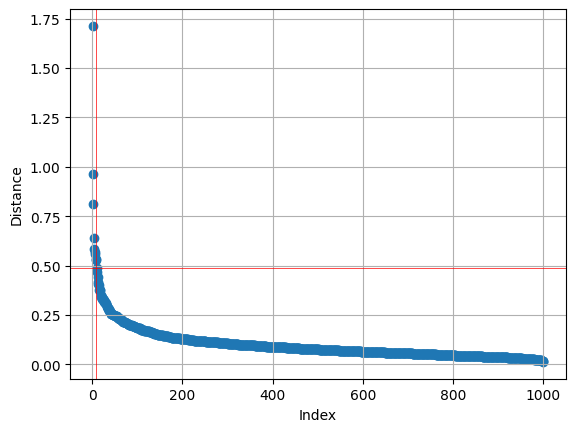

In [31]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid()
plt.show()

As you can see, even with this heuristic method is not obvious where there is an 'elbow'.

The curve is quite smooth, but it could be around 0.51 and 0.19. We can explore epsilon values in this range and use the Sihouette score to take the final decission (keep in mind that the optimal value of epsilon depends heavilly on the dataset).

 ## Exploring Epsilon values

Let's plug those values in the algorithm to see what happens.

In [32]:
np.arange(0.19,0.52,0.01) # 0.19, 0.20, 0.21, 0.22, 0.23,....

array([0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,
       0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51])

In [33]:
models = {}

for value in np.arange(0.19, 0.52, 0.01):
    model = DBSCAN(eps=value, min_samples=4) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    # pickle code to save the models....
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

    

In [34]:
# retrieve unique clusters of one model
clusters2 = np.unique(models["model_0.45"]["yhat"])
clusters2

array([-1,  0])

In [35]:
models["model_0.45"]["score"]

0.55

In [36]:
len(list(models.keys()))

33

In [37]:
list(models.items())

[('model_0.19',
  {'model': DBSCAN(eps=0.19, min_samples=4),
   'yhat': array([ 0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
           1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  6,
           1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,
           1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
           1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,
           0,  5,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,  0,
           0,  1,  1,  4,  1,  1,  0,  0,  2,  1,  1,  1,  0,  1,  1,  1,  1,
           0,  1,  0,  0,  1,  3,  0,  1,  4,  1, -1,  0,  0,  0,  0,  1,  1,
           1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  6, -1,  0,  0,  0,  0,
           1,  0,  0,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  3,  0,
           0,  1,  0,  1, -1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
           0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1,  0,  1,

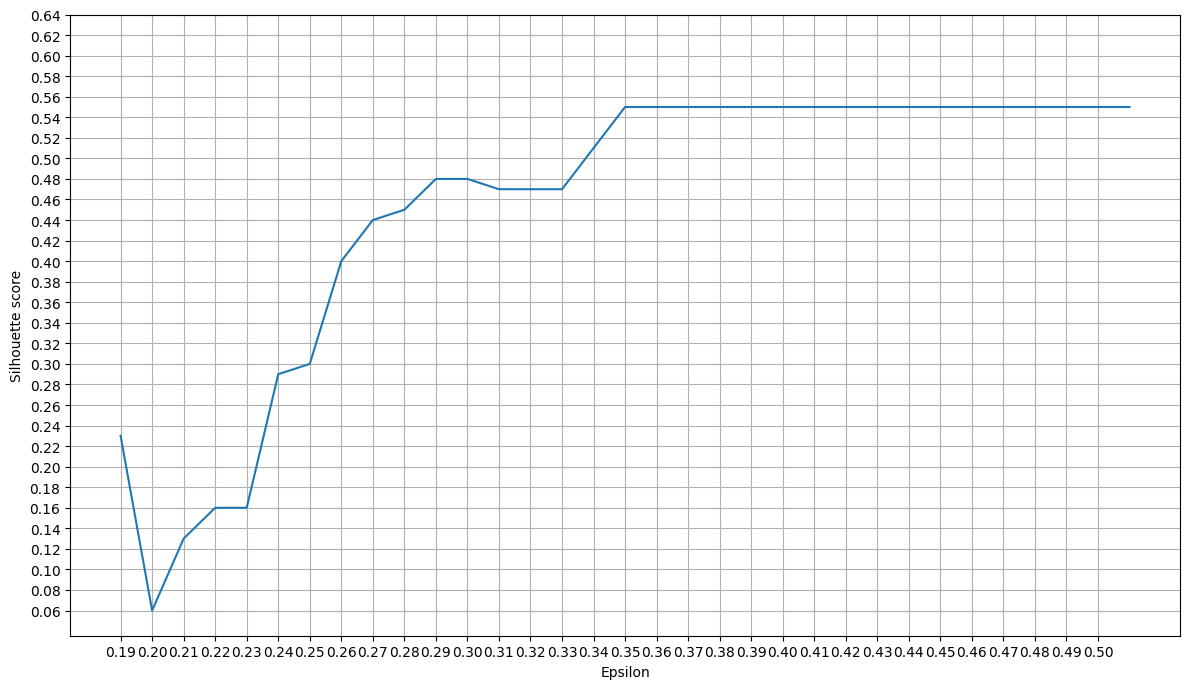

In [38]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(0.19, 0.52, 0.01)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

We are looking for the epsilon value which give us the models with the highest Silhouette score. In the previous figure it can be seen that the maximum of the curve is located for epsilon values >= 0.35. Therefore, we could set epsilon=0.35

In [ ]:
int(np.floor(6/3))

2

In [ ]:
int(len(list(models.keys()))/3)

11

In [ ]:
5/3

1.6666666666666667

In [ ]:
round(np.modf(2/3)[0],1) 

0.7

In this case we only have two features. Therefore, we can plots the clusterings. (In case of having more than three features it will not be possible to do it). 

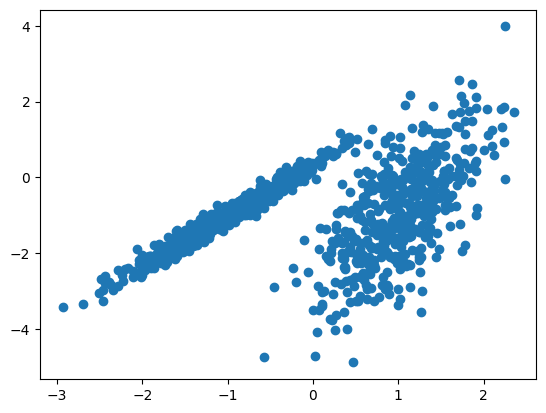

In [39]:
x_values, y_values = list(X_df.iloc[:,0].values), list(X_df.iloc[:,1].values)
plt.scatter(x_values, y_values)
plt.show()

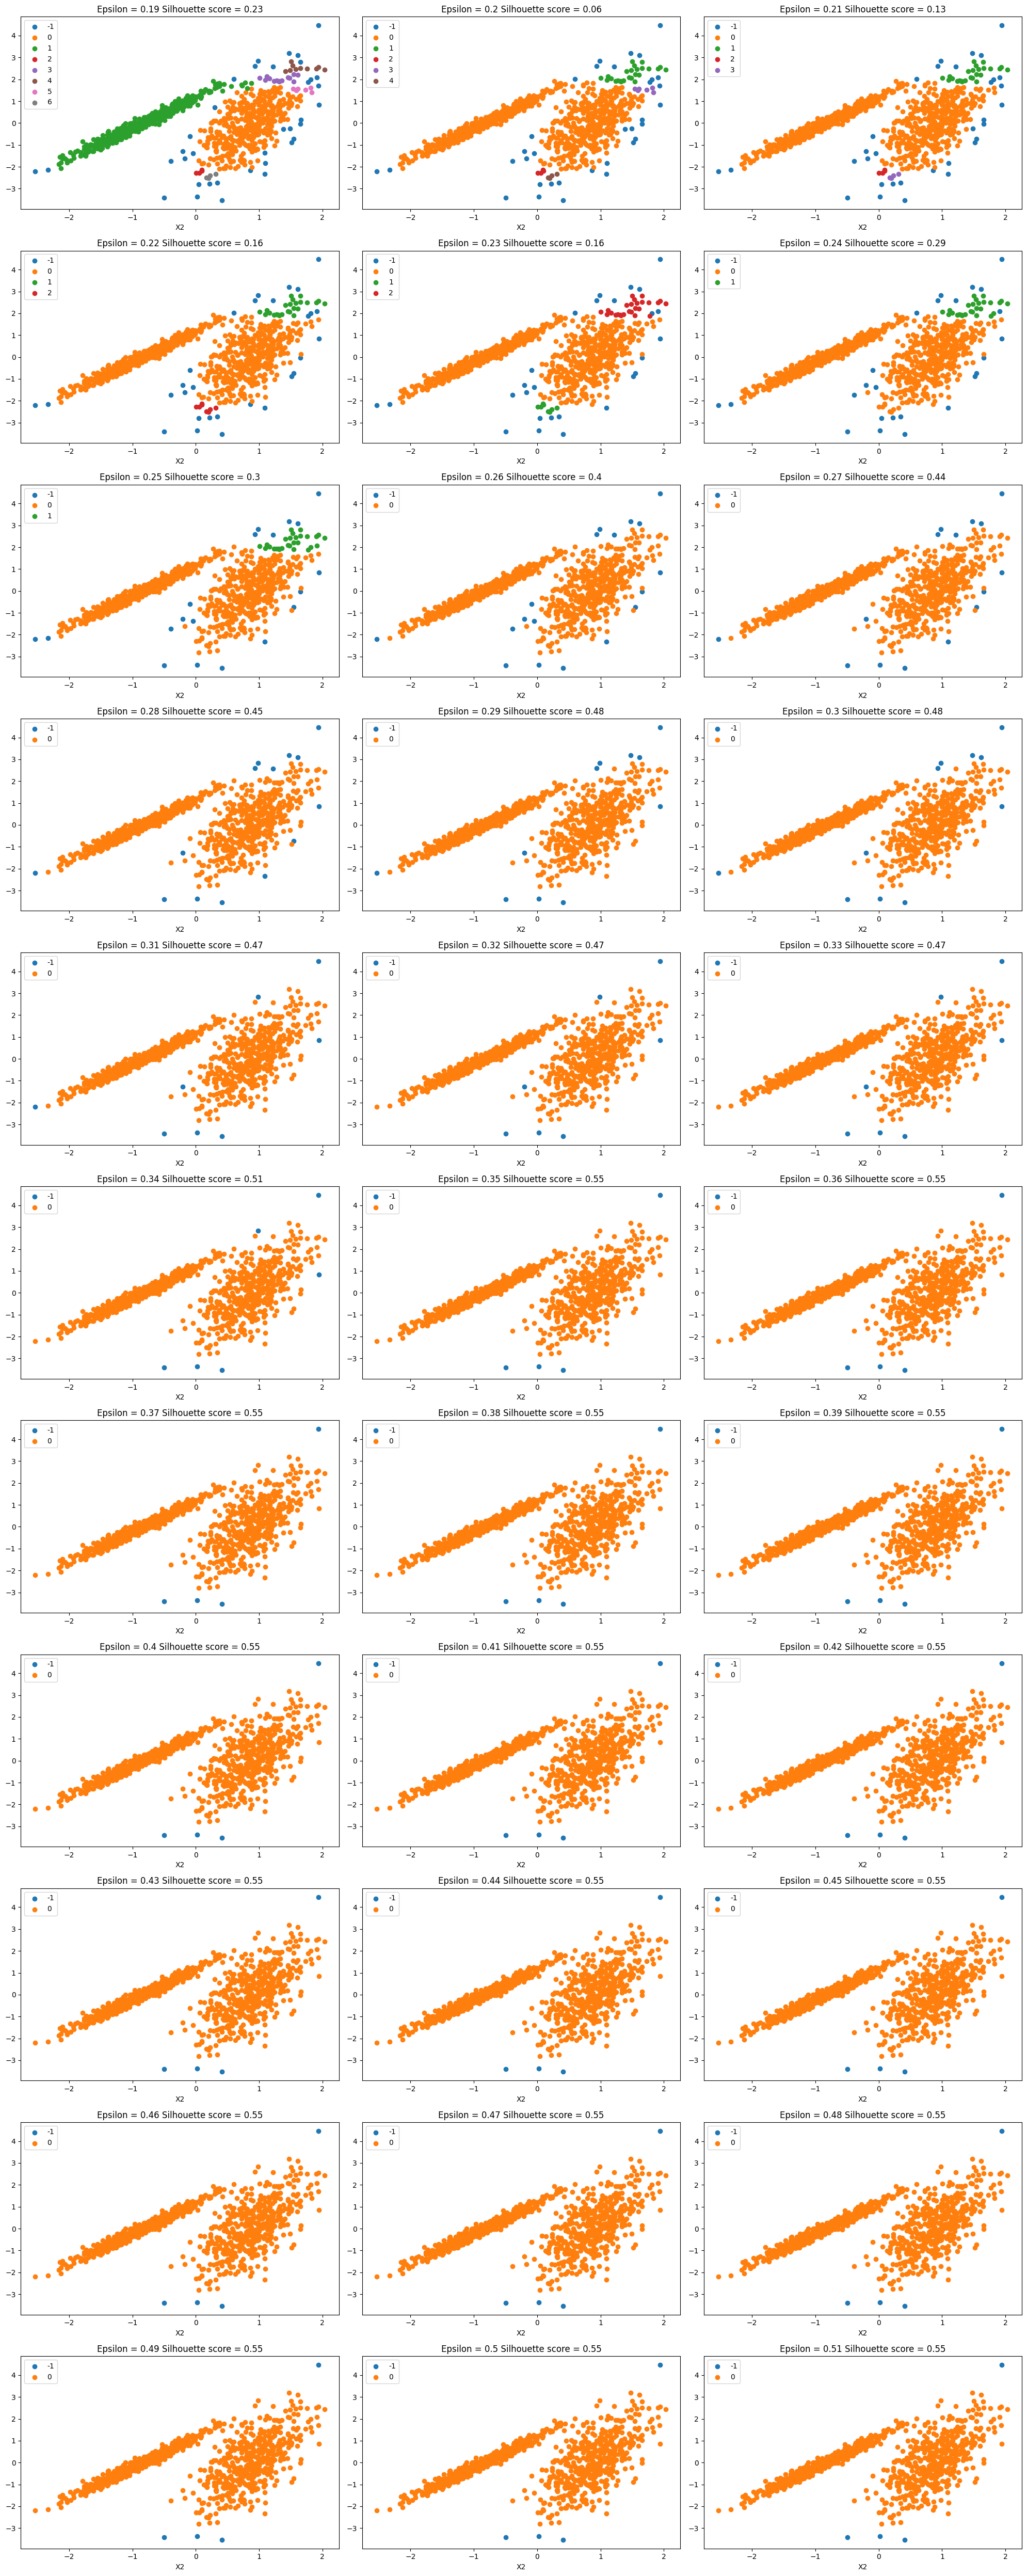

In [40]:
# create scatter plots for samples from each model
n_rows = int(len(list(models.keys()))/3)
fig, ax = plt.subplots(n_rows,3, figsize=(20,50))
for index, item in enumerate(list(models.items())):
	row_index = int(np.modf(index/3)[1])
	if ( round(np.modf(index/3)[0],1) == 0 ):
		col_index = 0
	elif ( round(np.modf(index/3)[0],1) == 0.3 ):
		col_index = 1
	else:
		col_index = 2
	for cluster in list(np.unique(item[1]['yhat'])):
		row_ix = np.where(item[1]['yhat'] == cluster)[0]
		x_values, y_values = list(X_scaled_df.iloc[row_ix,0].values), list(X_scaled_df.iloc[row_ix,1].values)
		ax[row_index, col_index].scatter(x_values, y_values, label=str(cluster))
		ax[row_index, col_index].set_xlabel("X1")
		ax[row_index, col_index].set_xlabel("X2")
		ax[row_index, col_index].set_title("Epsilon = "+item[0].split("_")[1]+" Silhouette score = "+str(item[1]['score']))
		ax[row_index, col_index].legend()
# show the plot
plt.tight_layout()
plt.show()

The selection of epsilon based on the Silhouette score resulted in a bad clustering why? Because Silhouette assumes "convex" clusters, but DBSCAN does not generate "convex" clusters. Therefore, the Silhouette score is playing against us here. See the definition of "convex" [here](https://en.wikipedia.org/wiki/Convex_set).